In [1]:
import spot
spot.setup()

In [2]:
seminator_path = '../seminator'
def seminator(filename, opt = ''):
    a = spot.automaton(f'{seminator_path} {opt} -s0 {filename} |')
    display(a)
    return a

def seminator_form(formula, opt = ''):
    a = spot.automaton(f'ltl2tgba "{formula}" | {seminator_path} {opt} -s0 |')
    display(a)
    return a

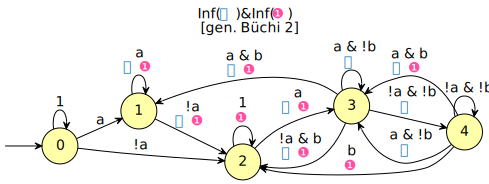

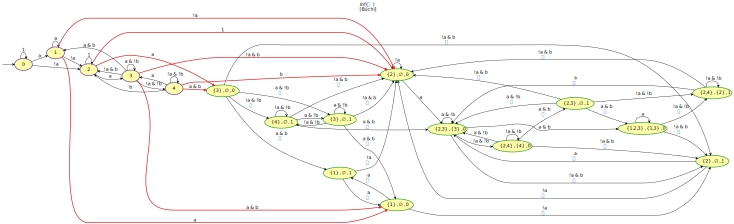

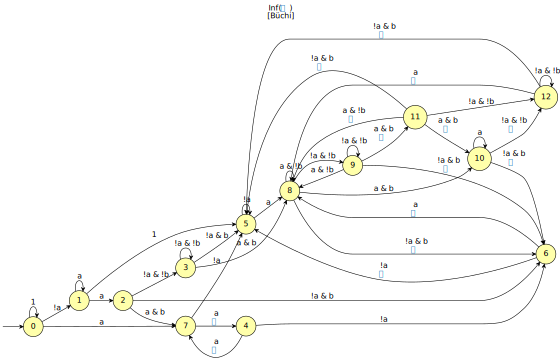

In [3]:
f = "FG(a | XF(a & XFb))"
in_a = spot.translate(f)
display(in_a)
seminator_form(f, '--highlight').postprocess()

## Test implementation

In [4]:
option = "skip-levels"

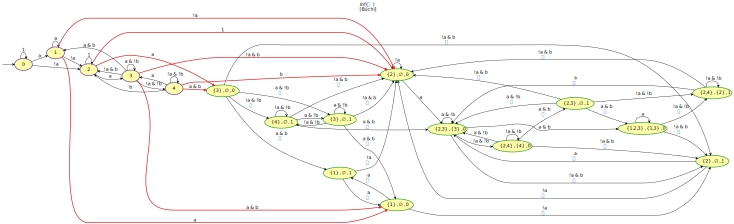

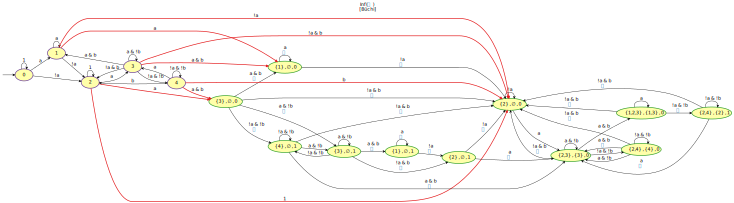

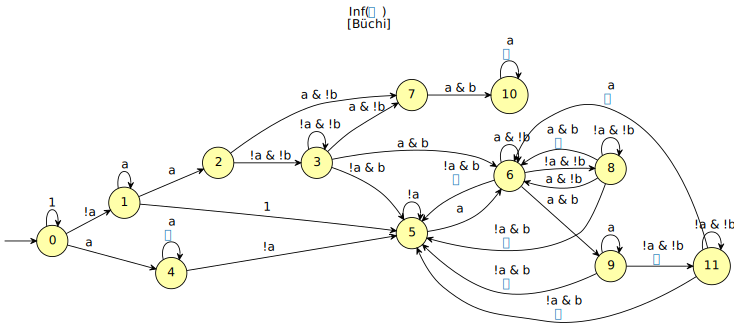

In [5]:
seminator_form(f,f"--highlight")
res = seminator_form(f,f"--highlight --{option}")
res.postprocess()

### Prepare test

In [33]:
print(in_a.to_str(), file=open(f"{option}.hoa",'w'))
res = !{seminator_path} -s0 --{option} {option}.hoa
result = "\n".join(res)
testfile = f"../tests/{option}.test"
test = f'''#!/bin/bash
set -e

cat >{option}.hoa <<EOF
{in_a.to_str()}
EOF

cat >{option}.expect <<EOF
{result}
EOF

../seminator -s0 --{option} {option}.hoa > {option}.out
cat {option}.out
diff {option}.out {option}.expect

rm {option}.hoa {option}.out {option}.expect
'''

In [34]:
print(test,file=open(testfile,'w'))
!chmod +x {testfile}

In [35]:
!{testfile}

HOA: v1
States: 16
Start: 0
AP: 2 "a" "b"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels trans-acc complete
properties: semi-deterministic
--BODY--
State: 0 "0"
[t] 0
[0] 1
[!0] 2
State: 1 "1"
[0] 1
[!0] 2
[0] 5
[!0] 6
State: 2 "2"
[t] 2
[0] 3
[t] 6
[0] 7
State: 3 "3"
[0&1] 1
[!0&1] 2
[0&!1] 3
[!0&!1] 4
[0&1] 5
[!0&1] 6
State: 4 "4"
[1] 2
[0] 3
[!0&!1] 4
[1] 6
[0&1] 7
State: 5 "{1} , ∅ , 0"
[0] 5 {0}
[!0] 6 {0}
State: 6 "{2} , ∅ , 0"
[!0] 6
[0] 8
State: 7 "{3} , ∅ , 0"
[0&1] 5 {0}
[!0&1] 6 {0}
[!0&!1] 9 {0}
[0&!1] 10 {0}
State: 8 "{2,3} , {3} , 0"
[!0&1] 6 {0}
[0&!1] 8
[!0&!1] 11
[0&1] 12
State: 9 "{4} , ∅ , 1"
[!0&1] 6 {0}
[0&1] 8 {0}
[!0&!1] 9
[0&!1] 10
State: 10 "{3} , ∅ , 1"
[!0&!1] 9
[0&!1] 10
[!0&1] 13 {0}
[0&1] 14 {0}
State: 11 "{2,4} , {4} , 0"
[!0&1] 6 {0}
[0&!1] 8
[0&1] 8 {0}
[!0&!1] 11
State: 12 "{1,2,3} , {1,3} , 0"
[!0&1] 6 {0}
[0] 12
[!0&!1] 15 {0}
State: 13 "{2} , ∅ , 1"
[!0] 6 {0}
[0] 8 {0}
State: 14 "{1} , ∅ , 1"
[!0] 13 {0}
[0] 14 {0}
St